In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("WindData.csv")

In [3]:
df.head()

,Unnamed: 0,index,Date,Time,Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (kW),Wind Speed (m/s),Temperature (K),Pressure (Pa),Roughness_length (m)
0,0,0,2018-01-01,00:00:00,416.328908,259.994904,380.047791,5.311336,267.57,98405.7,0.15
1,1,1,2018-01-01,01:00:00,557.372363,266.163605,447.605713,5.793008,267.55,98382.7,0.15
2,2,2,2018-01-01,02:00:00,824.662514,274.232910,710.587280,6.547414,267.54,98362.9,0.15
3,3,3,2018-01-01,03:00:00,773.172863,261.158691,736.647827,6.415083,267.56,98340.9,0.15
4,4,4,2018-01-01,04:00:00,1497.583724,256.407410,1493.807983,7.943102,267.61,98336.8,0.15


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.rename(columns={"LV ActivePower (kW)" : "Power" }, inplace=True)
df.head()

,index,Date,Time,Theoretical_Power_Curve (KWh),Wind Direction (°),Power,Wind Speed (m/s),Temperature (K),Pressure (Pa),Roughness_length (m)
0,0,2018-01-01,00:00:00,416.328908,259.994904,380.047791,5.311336,267.57,98405.7,0.15
1,1,2018-01-01,01:00:00,557.372363,266.163605,447.605713,5.793008,267.55,98382.7,0.15
2,2,2018-01-01,02:00:00,824.662514,274.232910,710.587280,6.547414,267.54,98362.9,0.15
3,3,2018-01-01,03:00:00,773.172863,261.158691,736.647827,6.415083,267.56,98340.9,0.15
4,4,2018-01-01,04:00:00,1497.583724,256.407410,1493.807983,7.943102,267.61,98336.8,0.15


In [5]:
df.isnull().sum()

index                            0
Date                             0
Time                             0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
Power                            0
Wind Speed (m/s)                 0
Temperature (K)                  0
Pressure (Pa)                    0
Roughness_length (m)             0
dtype: int64

In [6]:
df.corr()

,index,Theoretical_Power_Curve (KWh),Wind Direction (°),Power,Wind Speed (m/s),Temperature (K),Pressure (Pa),Roughness_length (m)
index,1.000000,6.945179e-03,-1.851479e-01,3.078874e-02,-1.387253e-02,3.078327e-01,-6.045483e-02,0.000000e+00
Theoretical_Power_Curve (KWh),0.006945,1.000000e+00,-1.037120e-01,9.500421e-01,9.440885e-01,-1.131241e-01,-4.758096e-02,2.737384e-15
Wind Direction (°),-0.185148,-1.037120e-01,1.000000e+00,-6.636874e-02,-8.332256e-02,-2.098131e-01,-4.598882e-02,-1.369369e-14
Power,0.030789,9.500421e-01,-6.636874e-02,1.000000e+00,9.130903e-01,-7.563785e-02,-7.207539e-02,4.239119e-16
Wind Speed (m/s),-0.013873,9.440885e-01,-8.332256e-02,9.130903e-01,1.000000e+00,-1.306299e-01,-8.484698e-02,1.602660e-15
Temperature (K),0.307833,-1.131241e-01,-2.098131e-01,-7.563785e-02,-1.306299e-01,1.000000e+00,1.817338e-02,-7.750275e-14
Pressure (Pa),-0.060455,-4.758096e-02,-4.598882e-02,-7.207539e-02,-8.484698e-02,1.817338e-02,1.000000e+00,-4.655093e-13
Roughness_length (m),0.000000,2.737384e-15,-1.369369e-14,4.239119e-16,1.602660e-15,-7.750275e-14,-4.655093e-13,1.000000e+00


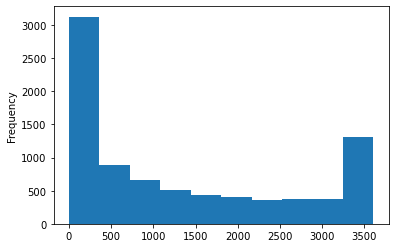

In [7]:
df['Power'].plot(kind='hist')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.columns

Index(['index', 'Date', 'Time', 'Theoretical_Power_Curve (KWh)',
       'Wind Direction (°)', 'Power', 'Wind Speed (m/s)', 'Temperature (K)',
       'Pressure (Pa)', 'Roughness_length (m)'],
      dtype='object')

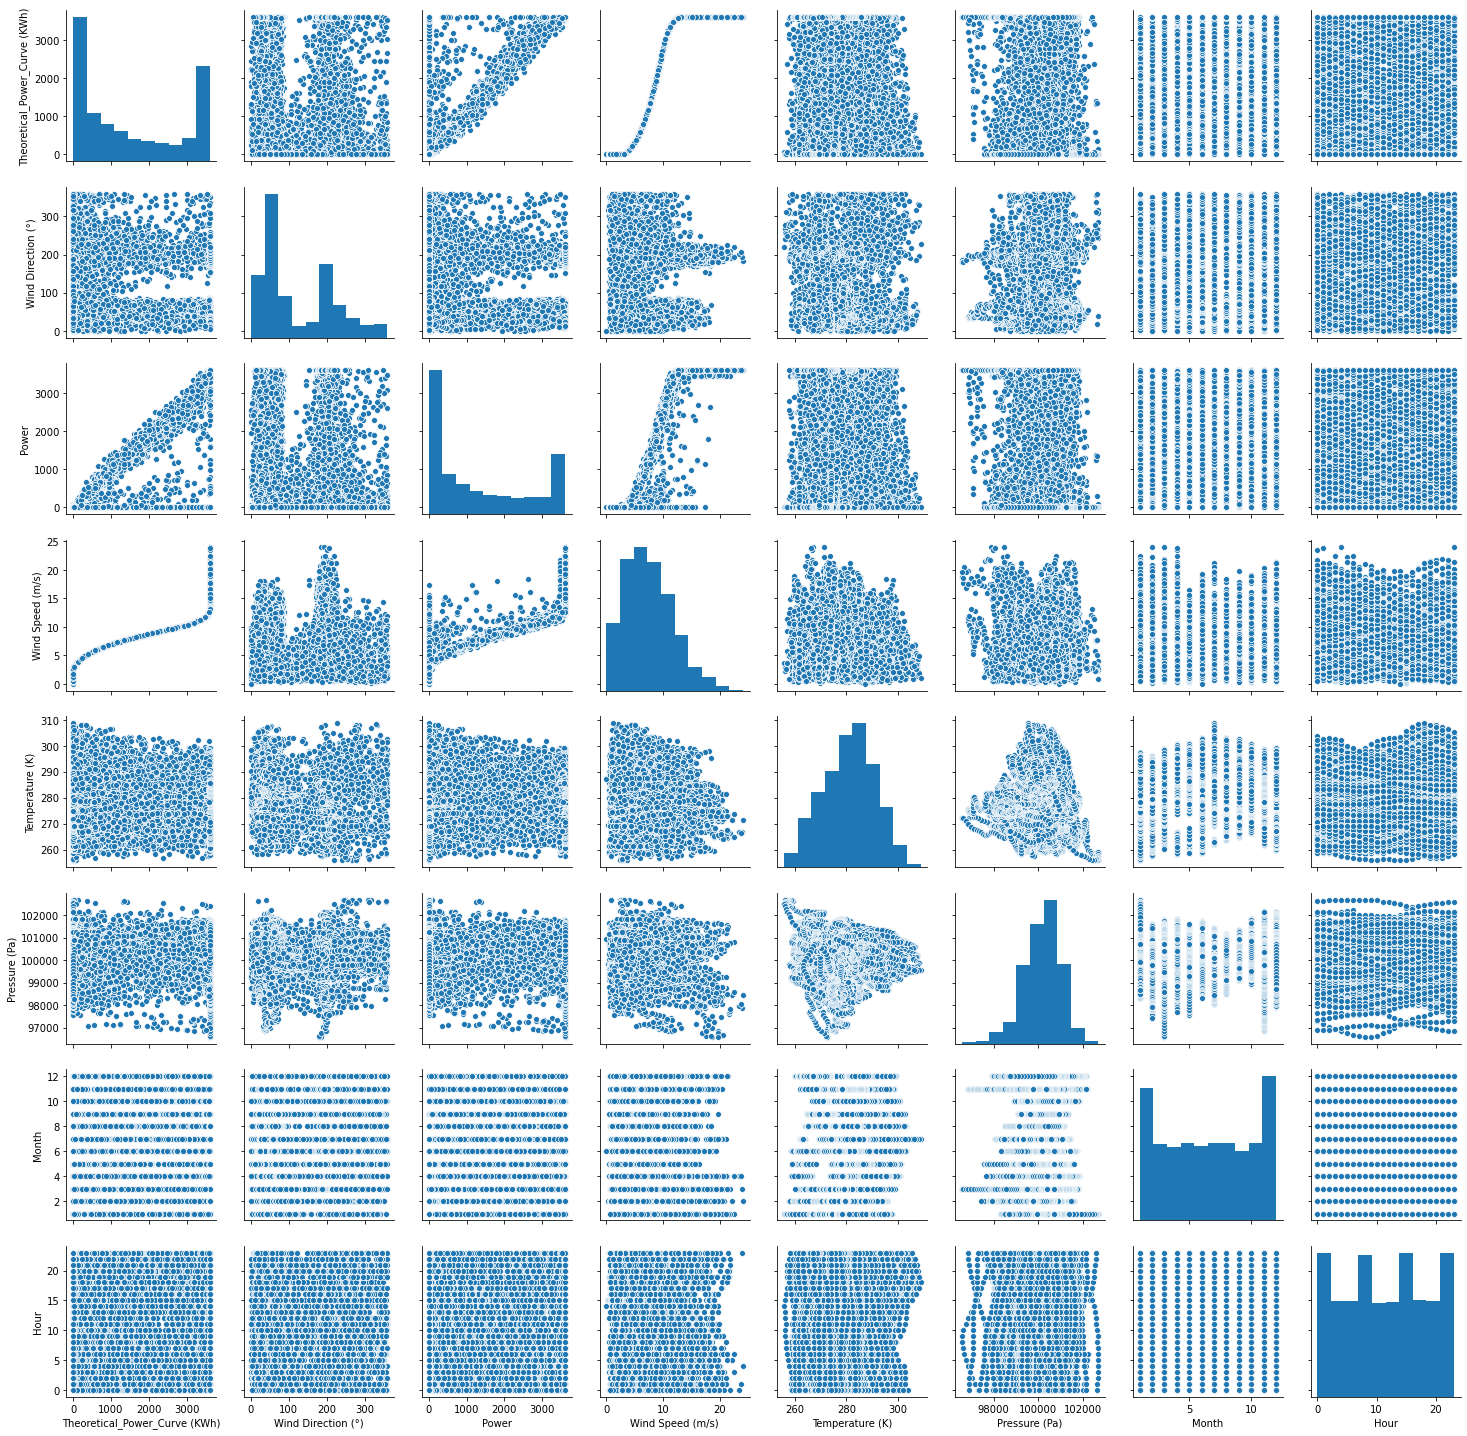

In [9]:
#Extract the month and and hour for further examination regarding the correlation with the other features
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Hour'] = pd.DatetimeIndex(df['Time']).hour
df.Month.unique()
df.Hour.unique()
df.drop('Time', axis=1)


df_important = df[['Theoretical_Power_Curve (KWh)', 'Wind Direction (°)',
       'Power', 'Wind Speed (m/s)', 'Temperature (K)',
       'Pressure (Pa)','Month','Hour']]
sns.pairplot(df_important)

In [10]:
corrs = df_important.corr(method='pearson').round(2)
print(corrs)

                               Theoretical_Power_Curve (KWh)  \
Theoretical_Power_Curve (KWh)                           1.00   
Wind Direction (°)                                     -0.10   
Power                                                   0.95   
Wind Speed (m/s)                                        0.94   
Temperature (K)                                        -0.11   
Pressure (Pa)                                          -0.05   
Month                                                  -0.06   
Hour                                                    0.03   

                               Wind Direction (°)  Power  Wind Speed (m/s)  \
Theoretical_Power_Curve (KWh)               -0.10   0.95              0.94   
Wind Direction (°)                           1.00  -0.07             -0.08   
Power                                       -0.07   1.00              0.91   
Wind Speed (m/s)                            -0.08   0.91              1.00   
Temperature (K)                  

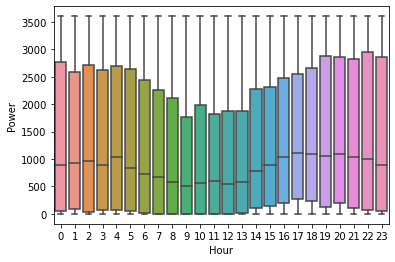

In [11]:
ax1 = sns.boxplot(x="Hour", y="Power", data=df)

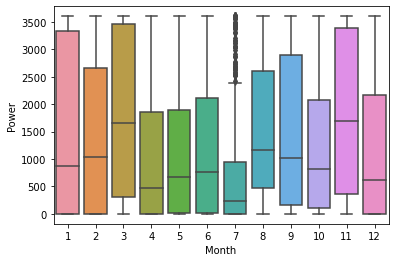

In [12]:
ax2 = sns.boxplot(x="Month", y="Power", data=df)

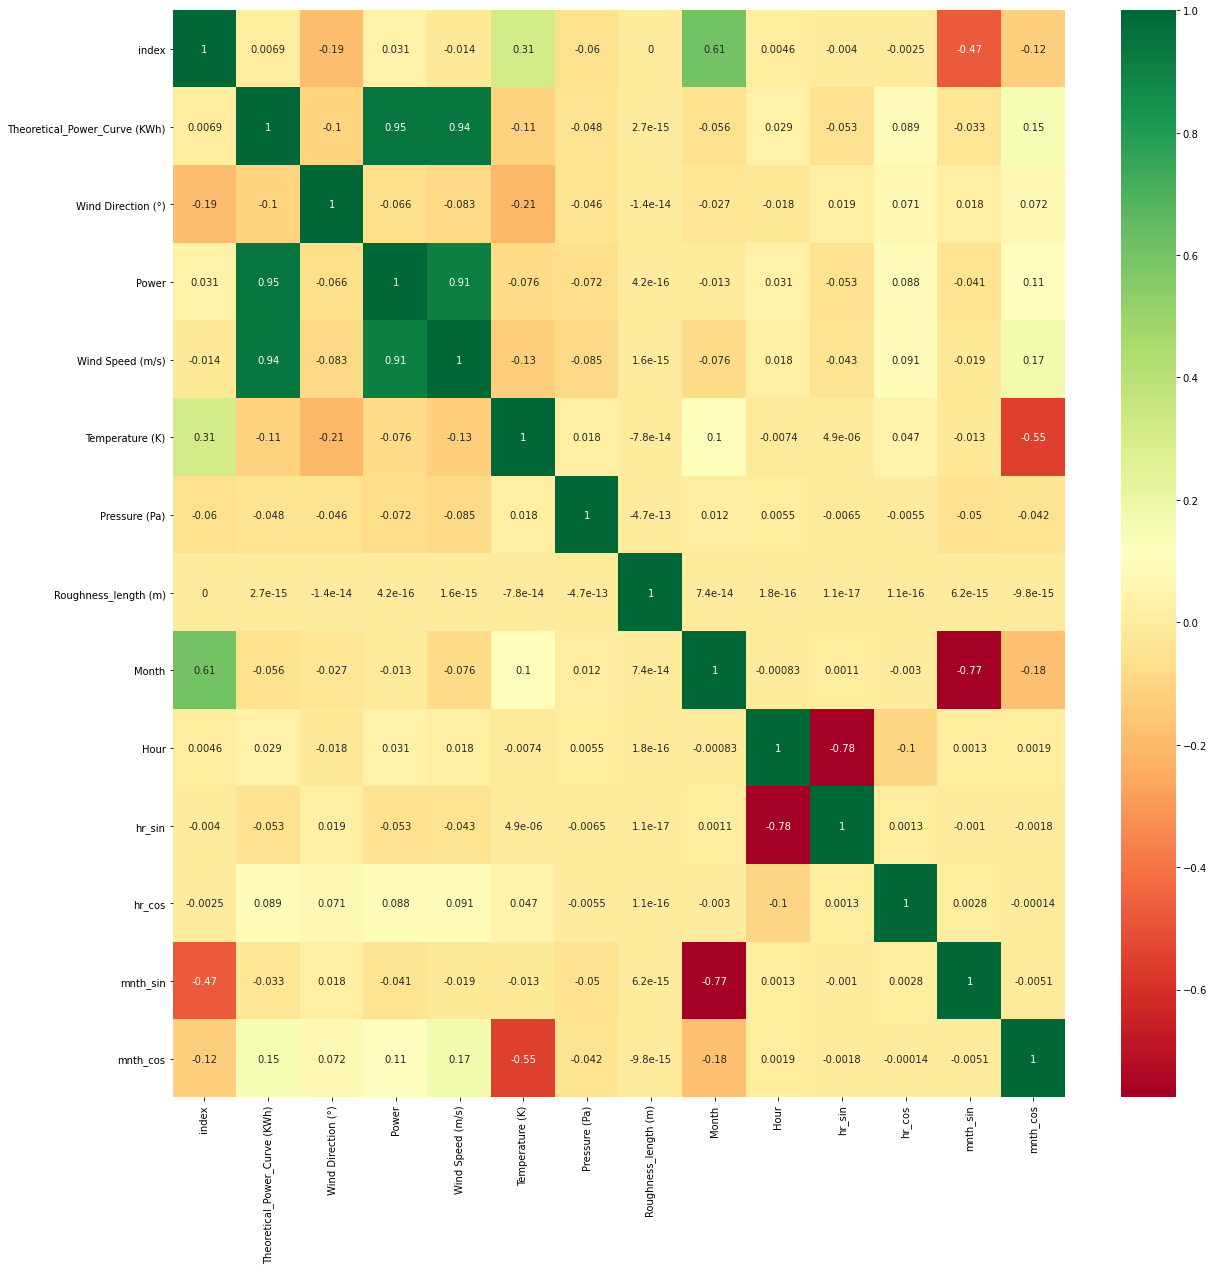

In [13]:
# Sin/Cos method
import numpy as np

df['hr_sin'] = np.sin(df.Hour*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.Hour*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))


corrmat = df.corr()
top_corr_feats = corrmat.index
plt.figure(figsize=(20, 20))
p = sns.heatmap(df[top_corr_feats].corr(), annot=True, cmap="RdYlGn")

In [14]:
# Simplifying our model with keeping the most correlated features

df_final = df[['Power','Theoretical_Power_Curve (KWh)',  'Wind Speed (m/s)']]

df_final.head()

,Power,Theoretical_Power_Curve (KWh),Wind Speed (m/s)
0,380.047791,416.328908,5.311336
1,447.605713,557.372363,5.793008
2,710.587280,824.662514,6.547414
3,736.647827,773.172863,6.415083
4,1493.807983,1497.583724,7.943102


In [15]:
df_final.to_csv('WindData_Model.csv')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

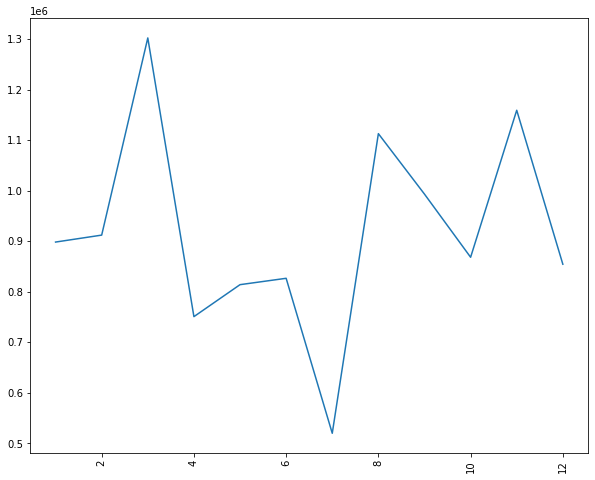

In [16]:
# Active Power Production across the year
plt.figure(figsize=(10,8))
plt.plot(df.Month.unique(),df.groupby(['Month']).sum().Power)
plt.xticks(rotation='vertical')

In [17]:
df_final.corr()

,Power,Theoretical_Power_Curve (KWh),Wind Speed (m/s)
Power,1.000000,0.950042,0.913090
Theoretical_Power_Curve (KWh),0.950042,1.000000,0.944089
Wind Speed (m/s),0.913090,0.944089,1.000000
